In [9]:

import os
from dotenv import load_dotenv
load_dotenv()
GPT_SECRET_KEY = os.environ.get("GPT_SECRET_KEY")
os.environ["OPENAI_API_KEY"] = GPT_SECRET_KEY
import re


In [10]:
from consultant.storage import VectorStore

In [3]:
from langchain_core.load import dumpd, dumps, load, loads
with open('langchain.tmp') as f:
    docs = loads(f.read())

/Users/veronikazhidyaevskaya/Documents/GitHub/Проект Практик/24-08-09_project_practic/ConsultantIntegrator/venv_bot/lib/python3.9/site-packages/langchain_core/_api/beta_decorator.py:87: LangChainBetaWarning: The function `loads` is in beta. It is actively being worked on, so the API may change.
  warn_beta(


In [4]:
print(docs[3].page_content)

Templates
🔍Advanced Retrieval - Query Transformation

A selection of advanced retrieval methods that involve transforming the original user query, which can improve retrieval quality.  
-  [Hypothetical Document Embeddings](/v0.2/docs/templates/hyde/) : A retrieval technique that generates a hypothetical document for a given query, and then uses the embedding of that document to do semantic search.  [Paper](https://arxiv.org/abs/2212.10496) .  
-  [Rewrite-Retrieve-Read](/v0.2/docs/templates/rewrite-retrieve-read/) : A retrieval technique that rewrites a given query before passing it to a search engine.  [Paper](https://arxiv.org/abs/2305.14283) .  
-  [Step-back QA Prompting](/v0.2/docs/templates/stepback-qa-prompting/) : A retrieval technique that generates a "step-back" question and then retrieves documents relevant to both that question and the original question.  [Paper](https://arxiv.org/abs//2310.06117) .  
-  [RAG-Fusion](/v0.2/docs/templates/rag-fusion/) : A retrieval techniqu

In [16]:
vs_langch = VectorStore.from_documents(docs, name='langchain_openai_1536', description='Содержимое сайта langcahin.com V02')

In [17]:
vs_langch.save()

# Вопросы к БЗ

In [4]:
from openai import OpenAI
from langchain_openai import OpenAIEmbeddings
from langchain.vectorstores import FAISS

In [13]:
db = FAISS.load_local('vector_stores/python_langchain', OpenAIEmbeddings(), allow_dangerous_deserialization=True)

In [21]:
req = 'Напиши подробно по шагам, как на питое создать диалог Человек - Модель от Google (Gemini)'


0===== {'H1': 'Google AI chat models', 'H2': 'Multimodal support', 'source': 'https://python.langchain.com/v0.1/docs/integrations/chat/google_generative_ai/', 'chapter': 'google_generative_ai', 'tokens': 89, 'part_num': 5}
Продолжение 4
Google AI chat models
Multimodal support
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
content=[
{
"type": "text",
"text": "What's in this image?",
},  # You can optionally provide text parts
{"type": "image_url", "image_url": image_url},
]
)
llm.invoke([message])
```

1===== {'H1': 'Google AI chat models', 'H2': 'Multimodal support', 'source': 'https://python.langchain.com/v0.2/docs/integrations/chat/google_generative_ai/', 'chapter': 'google_generative_ai', 'tokens': 138, 'part_num': 5}
Продолжение 4
Google AI chat models
Multimodal support
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
# example
message = HumanMessage(
content=[
{
"type": "text",
"text": "What's in this image?",
},  # You can opti
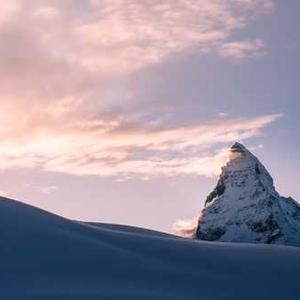
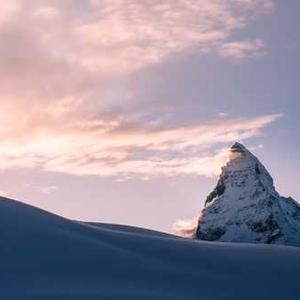

In [22]:
docs = db.similarity_search(req, k=10)
for i,doc in enumerate(docs):
    print(f'\n{i}=====', doc.metadata)
    print(doc.page_content)

In [23]:
client = OpenAI()
model = os.getenv('model_gpt')
message_content = ''
for i, doc in enumerate(docs):
        message_content += re.sub(r'\n{2}', ' ', f'\n№{i+1}\n====' + doc.page_content + '\n')
messages = [
      {"role": "system", "content": 'Ты самый крутой эксперт по библиотеке Langchain. Дай максимально подробный и понятный ответ на воопрос пользователя на основании Информации, если требуется приведи код на python. Отвечай на русском.'},
      {"role": "user", "content": f"Информация:\n{message_content}\n\nВопрос пользователя: {req}"}
      ]
    
try:
        completion =  client.chat.completions.create(
                model=model,
                messages=messages,
                temperature=0
            )
except:
        print(f"Permission denied error")
resp = completion.choices[0].message.content
print(resp)

Для создания диалога между человеком и моделью от Google (Gemini) с использованием библиотеки Langchain, следуйте этим шагам:

### Шаг 1: Установка необходимых библиотек

Убедитесь, что у вас установлены необходимые библиотеки. Если нет, установите их с помощью pip:

```bash
pip install langchain langchain-google-genai
```

### Шаг 2: Импорт необходимых модулей

Импортируйте необходимые модули из библиотеки Langchain:

```python
from langchain.llms import ChatGoogleGenerativeAI
from langchain_core.messages import HumanMessage, AIMessage
```

### Шаг 3: Инициализация модели

Создайте объект модели, указав нужную версию модели. В данном случае мы используем модель "gemini-pro-vision":

```python
llm = ChatGoogleGenerativeAI(model="gemini-pro-vision")
```

### Шаг 4: Создание сообщения от человека

Создайте сообщение от человека. В данном примере мы используем мультимодальное сообщение, которое включает текст и изображение:

```python
image_url = "https://example.com/path/to/your/image.jp